# Hyperparameter Optimization

Import required libraries, load in datasets, and combine datasets into a single dataframe.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfRed = pd.read_csv('winequality-red.csv', sep = ';')
dfRed['color'] = 0
dfWhite = pd.read_csv('winequality-white.csv', sep =  ';')
dfWhite['color'] = 1

In [4]:
df = pd.concat([dfRed, dfWhite])

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Check out pairplots to see if there is a difference in any of the values for red and white wines.

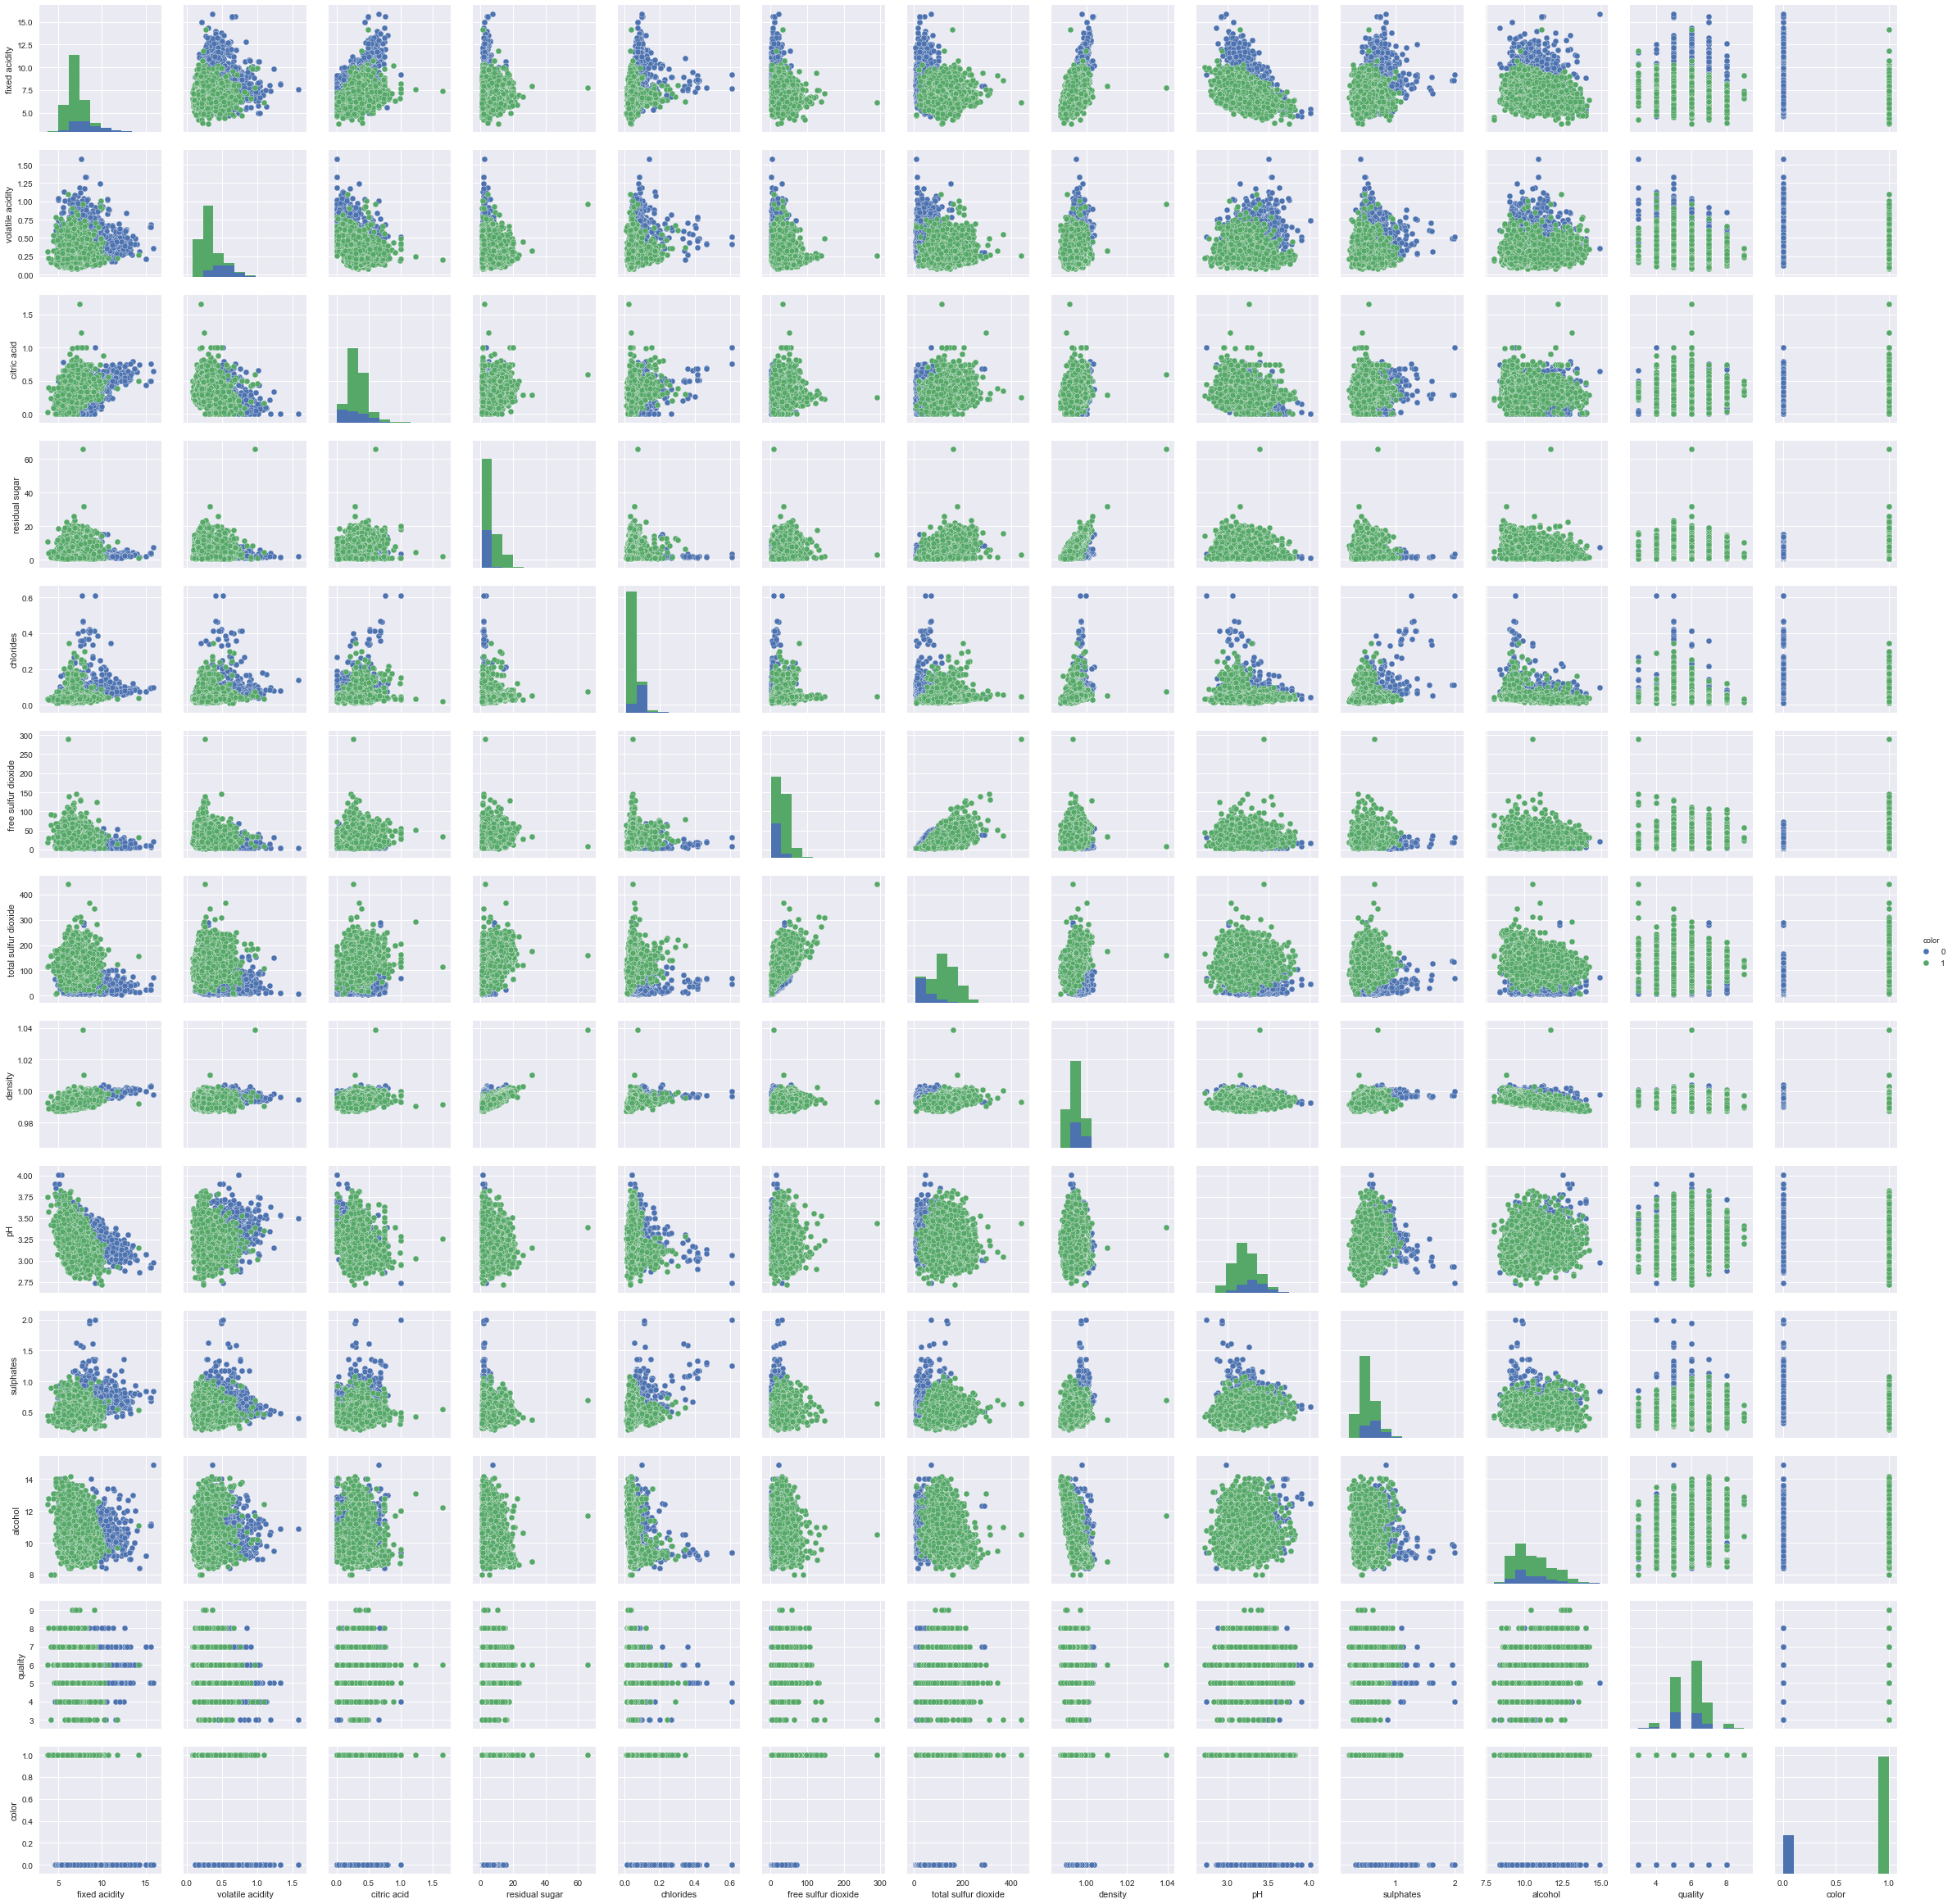

In [6]:
## some data exploration
sns.pairplot(df, hue = 'color')
plt.show()

It does appear that there is a difference in most variables for red and white wines, so it should be possible to train a classification model to correctly classify wines as red or white.

# Training and testing a "default" random forest classifier

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = df.drop(['color'], axis = 1)
y = df['color']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 1)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(x_train, y_train)
y_predF = modelF.predict(x_test)


print('Forest accuracy: ', accuracy_score(y_test, y_predF))

Forest accuracy:  0.991538461538


In [10]:
print(forest)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)


let's look at this visually with a validation curve...

# Choosing hyperparameters based on validation curves

In [11]:
from sklearn.model_selection import validation_curve

In [12]:
num_est = [100, 300, 500, 750, 800, 1200]
print(num_est)

train_scoreNum, test_scoreNum = validation_curve(RandomForestClassifier(),
                                                X = x_train, 
                                                y = y_train, 
                                                param_name = 'n_estimators',
                                                param_range = num_est, 
                                                cv = 3)

[100, 300, 500, 750, 800, 1200]


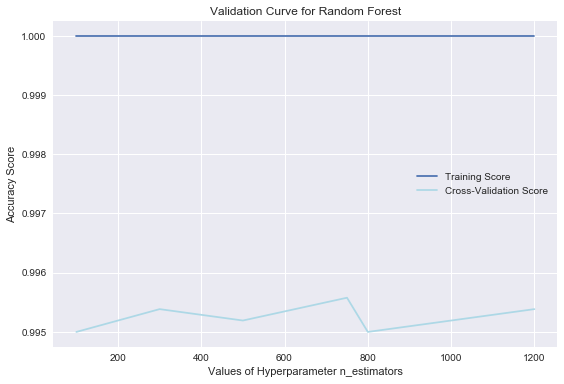

In [34]:
tr_meanNum = np.mean(train_scoreNum, axis = 1)
tr_stdNum = np.std(train_scoreNum, axis = 1)

te_meanNum = np.mean(test_scoreNum, axis = 1)
te_stdNum = np.std(test_scoreNum, axis = 1)

plt.plot(num_est, tr_meanNum, label = 'Training Score')
plt.plot(num_est, te_meanNum, label = 'Cross-Validation Score', color = 'lightblue')
plt.title('Validation Curve for Random Forest')
plt.xlabel('Values of Hyperparameter n_estimators')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()





In [31]:
max_dep = np.arange(5, 35, 5)

train_scoreDep, test_scoreDep = validation_curve(RandomForestClassifier(),
                                                X = x_train, 
                                                y = y_train, 
                                                param_name = 'max_depth',
                                                param_range = max_dep, 
                                                cv = 3)


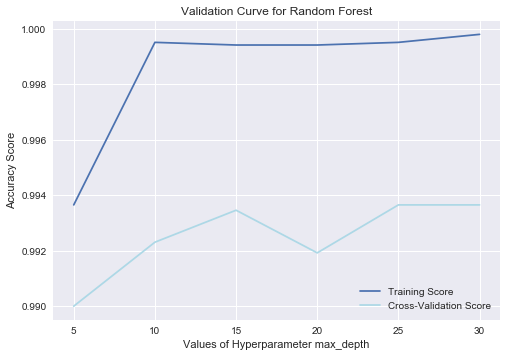

In [33]:
tr_meanDep = np.mean(train_scoreDep, axis = 1)
tr_stdDep = np.std(train_scoreDep, axis = 1)

te_meanDep = np.mean(test_scoreDep, axis = 1)
te_stdDep = np.std(test_scoreDep, axis = 1)

plt.plot(max_dep, tr_meanDep, label = 'Training Score')
plt.plot(max_dep, te_meanDep, label = 'Cross-Validation Score', color = 'lightblue')
plt.title('Validation Curve for Random Forest')
plt.xlabel('Values of Hyperparameter max_depth')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
plt.show()

In [36]:
min_split = [2, 5, 10, 15, 20, 25]

train_scoreSplit, test_scoreSplit = validation_curve(RandomForestClassifier(),
                                                X = x_train, 
                                                y = y_train, 
                                                param_name = 'min_samples_split',
                                                param_range = min_split, 
                                                cv = 3)


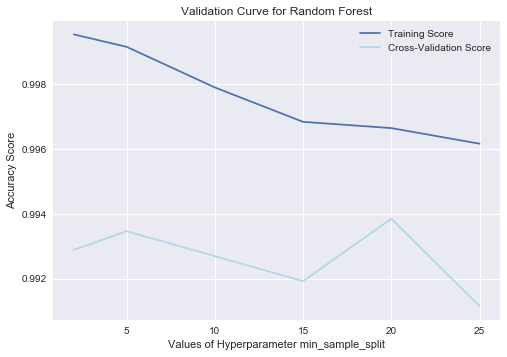

In [37]:
tr_meanSplit = np.mean(train_scoreSplit, axis = 1)
tr_stdSplit = np.std(train_scoreSplit, axis = 1)

te_meanSplit = np.mean(test_scoreSplit, axis = 1)
te_stdSplit = np.std(test_scoreSplit, axis = 1)

plt.plot(min_split, tr_meanSplit, label = 'Training Score')
plt.plot(min_split, te_meanSplit, label = 'Cross-Validation Score', color = 'lightblue')
plt.title('Validation Curve for Random Forest')
plt.xlabel('Values of Hyperparameter min_sample_split')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
plt.show()

In [39]:
min_leaf = [1, 2, 5, 10]

train_scoreLeaf, test_scoreLeaf = validation_curve(RandomForestClassifier(),
                                                X = x_train, 
                                                y = y_train, 
                                                param_name = 'min_samples_leaf',
                                                param_range = min_leaf, 
                                                cv = 3)


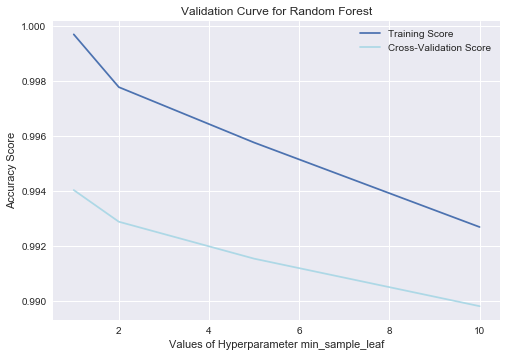

In [41]:
tr_meanLeaf = np.mean(train_scoreLeaf, axis = 1)
tr_stdLeaf = np.std(train_scoreLeaf, axis = 1)

te_meanLeaf= np.mean(test_scoreLeaf, axis = 1)
te_stdLeaf = np.std(test_scoreLeaf, axis = 1)

plt.plot(min_leaf, tr_meanLeaf, label = 'Training Score')
plt.plot(min_leaf, te_meanLeaf, label = 'Cross-Validation Score', color = 'lightblue')
plt.title('Validation Curve for Random Forest')
plt.xlabel('Values of Hyperparameter min_sample_leaf')
plt.ylabel('Accuracy Score')
plt.legend(loc = 'best')
plt.show()

In [45]:
forestVC = RandomForestClassifier(random_state = 1, n_estimators = 750, 
                                  max_depth = 15, min_samples_split = 5, 
                                 min_samples_leaf = 1)
modelVC = forestVC.fit(x_train, y_train)

y_predVC = modelVC.predict(x_test)

print('Accuracy ', accuracy_score(y_test, y_predVC))


Accuracy  0.993076923077


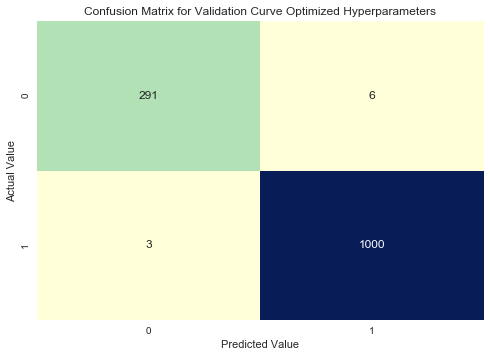

In [52]:
cmVC= confusion_matrix(y_test, y_predVC)
sns.heatmap(cm, annot= True, fmt = 'g', cbar = False,  cmap ="YlGnBu")
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Confusion Matrix for Validation Curve Optimized Hyperparameters')
plt.show()

# Choosing hyperparameters based on exhaustive grid search

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

print(bestF.best_estimator_)
print("The mean accuracy of the model is:",bestF.score(x_train, y_train) )

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 21.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 25.5min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)
The mean accuracy of the model is: 1.0


In [46]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 500, 
                                   min_samples_split = 2, min_samples_leaf = 1)
                                   
modelOpt = forestOpt.fit(x_train, y_train)
y_pred = modelOpt.predict(x_test)  

print('Optimized Accuracy: ', accuracy_score(y_pred, y_test))                   

Optimized Accuracy:  0.993076923077


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
cm = confusion_matrix(y_test, y_pred)

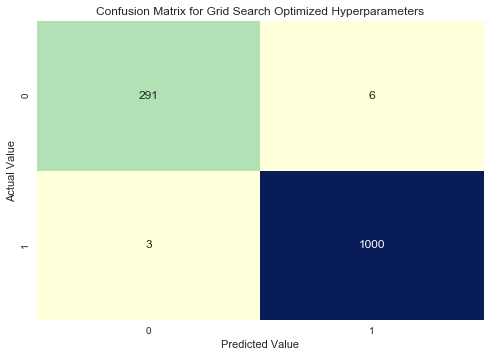

In [53]:
sns.heatmap(cm, annot= True, fmt = 'g', cbar = False, cmap ="YlGnBu")
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.title('Confusion Matrix for Grid Search Optimized Hyperparameters')
plt.show()